In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.ndimage


sns.set()
# mvnrnd is np.random.multivariate_normal

# Question 1

## Part A

In [5]:
# A * exp(-r*n) is the μ(θ) for this signal

## Part B

## Part D

There will be a certain point where the signal $x[n]$ will be dominated by the noise and there will no longer be possible to improve the estimate of A due to signal noise. Therefore it will be impossible to reduce the variance of the estimate of A.

## Part E

Sometimes the covar matrix or FIM is not an invertable matrix...

Whenever the determinant of the FIM is equal to 0 then you cannot jointly determine A and r (it will be impossible to invert the Fisher Information Matrix)

# Question 2

- Calculate score V(θ)
- Convert to form J[g(...) - θ]
- then use equation V(θ) = J[T - θ]
- Best estimator is just T = g(...)

# Question 3

$\frac{\partial \mathbf{\mu}(\theta)}{\partial x} = \frac{\partial}{\partial x}  \Big( -40 -40log_{10}(\sqrt{4 + (b_x[i] - x)^2 + (b_y[i] - i)^2}) \Big ) = \frac{40(b_x[i] - x)}{ln(10) \big ( (b_x[i] - x)^2 + (b_y[i] - y)^2 + 4 \big )}$

$\frac{\partial \mathbf{\mu}(\theta)}{\partial y} = \frac{\partial}{\partial y} \Big ( -40 -40log_{10} (\sqrt{4 + (b_x[i] - x)^2 + (b_y[i] - i)^2} ) \Big ) = \frac{40(b_y[i] - y)}{ln(10) \big ( (b_x[i] - x)^2 + (b_y[i] - y)^2 + 4 \big )}$

In [43]:
# Return the FIM for the x, y position and for a list of beacons (each x,y coordinates)
def fisher(x, y, beacons):
    J = np.zeros((2,2))
    ss_inv = 1 / 4**2
    for bx, by in beacons:
        # Note: np.log is the natural log
        # Derivative w.r.t. x
        dx = 40*(bx - x) / (np.log(10) * ((bx-x)**2 + (by-y)**2 + 4))
        dy = 40*(by - y) / (np.log(10) * ((bx-x)**2 + (by-y)**2 + 4))
        
        J[0,0] += dx * ss_inv * dx # Jxx
        J[0,1] += dx * ss_inv * dy # Jxy
        J[1,0] += dy * ss_inv * dx # Jyx
        J[1,1] += dy * ss_inv * dy # Jyy
    
    return J

In [116]:
# Grid of x,y positions
xs = np.linspace(0, 10, 500)
ys = np.linspace(0, 10, 500)

In [117]:
x_shape = xs.shape
y_shape = ys.shape
fisher_shape = (2,2)

# Create a grid of FIMs that correspond to the FIM of each x,y point in the grid
fim_grid = np.zeros(x_shape + y_shape + fisher_shape)
fim_grid.shape # Check that shape of grid is correct, expect (50, 50, 2, 2)

(500, 500, 2, 2)

In [118]:
# For all 8 beacons
# X,Y coordinates of each beacon
beacons = [(0,0), (10,0), (0,10), (10,10), (5,0), (10,5), (5,10), (0,5)]

for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        fim_grid[i, j, :, :] = fisher(x, y, beacons)
        
fim_grid[0, 0, :, :]

array([[0.92205785, 0.15866348],
       [0.15866348, 0.92205785]])

In [119]:
fim_grid_4 = np.zeros_like(fim_grid)
beacons_4 = [(0,0), (10,0), (0,10), (10,10)]

for i, x in enumerate(xs):
    for j, y in enumerate(ys):
        fim_grid_4[i, j, :, :] = fisher(x, y, beacons_4)
        
fim_grid_4[2, 0, :, :]

array([[0.22288844, 0.0447975 ],
       [0.0447975 , 0.22005621]])

In [199]:
# For nicer plots
cmap = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)
plt.rcParams["figure.figsize"] = (14,5)

vmin = np.min(np.concatenate((fim_grid[:, :, :, :], fim_grid_4[:, :, :, :])))
vmax = np.max(np.concatenate((fim_grid[:, :, :, :], fim_grid_4[:, :, :, :])))
vmin, vmax

(-0.5802901110475153, 2.862585919749565)

In [200]:
# Just for display purposes let's use range -1 to 3
vmin, vmax = -1, 3

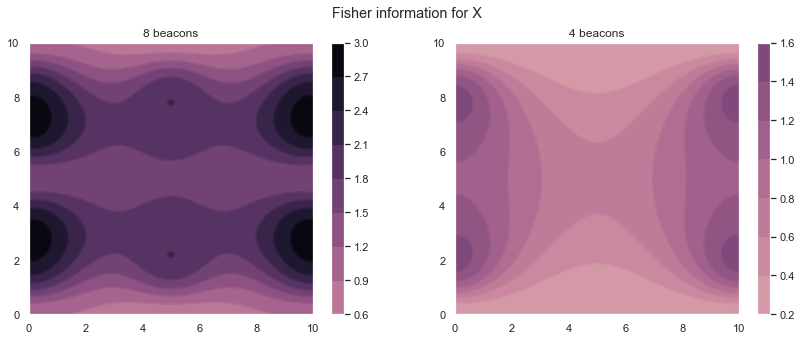

In [201]:
X, Y = np.meshgrid(xs, ys)
Zs = (fim_grid[:, :, 0, 0], fim_grid_4[:, :, 0, 0]) # The x fisher information
labels = ("8 beacons", "4 beacons")

fig, axes = plt.subplots(1, 2)
for ax, Z, label in zip(axes, Zs, labels):
    c1 = ax.contourf(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    c2 = ax.contour(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax) # Makes plot look smoother
    fig.colorbar(c1, ax=ax)
    ax.set_title(label)
fig.suptitle("Fisher information for X")
plt.show()

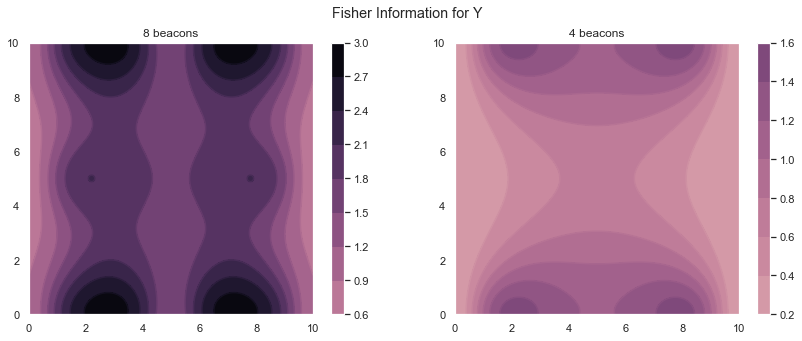

In [202]:
X, Y = np.meshgrid(xs, ys)
Zs = (fim_grid[:, :, 1, 1], fim_grid_4[:, :, 1, 1]) # The y fisher information
labels = ("8 beacons", "4 beacons")

fig, axes = plt.subplots(1, 2)
for ax, Z, label in zip(axes, Zs, labels):
    c1 = ax.contourf(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    c2 = ax.contour(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax) # Makes plot look smoother
    fig.colorbar(c1, ax=ax)
    ax.set_title(label)
fig.suptitle("Fisher Information for Y")
plt.show()

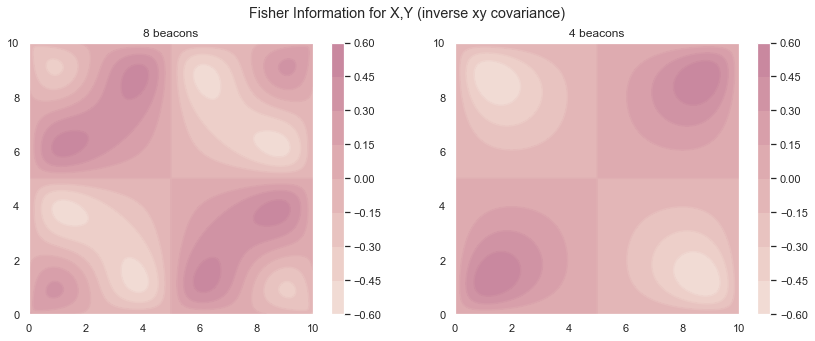

In [203]:
X, Y = np.meshgrid(xs, ys)
Zs = (fim_grid[:, :, 0, 1], fim_grid_4[:, :, 0, 1]) # The xy fisher information
labels = ("8 beacons", "4 beacons")

fig, axes = plt.subplots(1, 2)
for ax, Z, label in zip(axes, Zs, labels):
    c1 = ax.contourf(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    c2 = ax.contour(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax) # Makes plot look smoother
    fig.colorbar(c1, ax=ax)
    ax.set_title(label)
fig.suptitle("Fisher Information for X,Y (inverse xy covariance)")
plt.show()